### Increasing the Maize Leaf Disease Dataset Using Contrast Technique

In [1]:
import PIL
import numpy as np
import os
import tensorflow as tf
import cv2
import keras
import pathlib
import glob
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import numpy

### Loading of the data

In [2]:
data_dir=pathlib.Path(os.getcwd()+"/maize_leaf_diseases_dataset/") 
maize_disease_dataset=list(glob.glob(f"{data_dir}/data/*.jpg"))
len(maize_disease_dataset)

4186

### Converting images to pixels

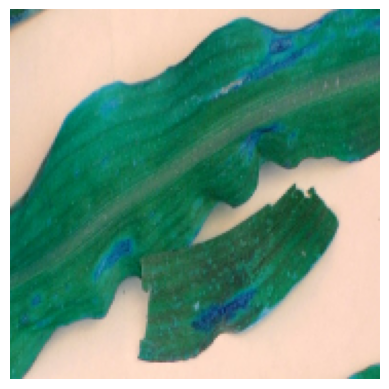

In [3]:
x=[]
for image in maize_disease_dataset:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    x.append(resized_img)
x=np.array(x)
plt.imshow(x[0])
plt.axis('off')
plt.show()

In [4]:
print(x[0])
print(x.dtype)

[[[ 29  86  77]
  [ 36  84  69]
  [ 28  84  60]
  ...
  [  1 110  84]
  [  1 103  75]
  [  2 109  86]]

 [[ 19  83  66]
  [ 24  79  58]
  [ 27  87  62]
  ...
  [  3 115  87]
  [  3 111  83]
  [  8 109  86]]

 [[ 25  85  71]
  [ 35  87  73]
  [ 30  85  69]
  ...
  [  5 120  95]
  [  4 118  96]
  [ 14 121 103]]

 ...

 [[ 26 135  96]
  [ 34 143 117]
  [ 20 136 105]
  ...
  [ 15 125  88]
  [ 16 124  85]
  [ 12 123  81]]

 [[ 22 131  96]
  [ 25 134 109]
  [ 17 133 106]
  ...
  [ 10 122  83]
  [ 11 116  79]
  [ 11 118  80]]

 [[ 20 131  97]
  [ 30 139 114]
  [ 26 140 119]
  ...
  [ 15 124  84]
  [ 14 117  81]
  [ 13 113  75]]]
uint8


### Test, Train Split

In [5]:
x_train,x_test=train_test_split(x,test_size=0.3,random_state=0) #Splitting
print(len(x_train))
print(len(x_test))

2930
1256


### Scalling the pixels to the range of 0...1

[[[0.64313725 0.62745098 0.65098039]
  [0.63921569 0.62745098 0.64705882]
  [0.64313725 0.63137255 0.65490196]
  ...
  [0.39215686 0.36078431 0.40392157]
  [0.32941176 0.29803922 0.34117647]
  [0.36470588 0.33333333 0.37254902]]

 [[0.63921569 0.62352941 0.64705882]
  [0.63529412 0.61960784 0.64313725]
  [0.63921569 0.62352941 0.64705882]
  ...
  [0.51764706 0.48627451 0.52941176]
  [0.43921569 0.40784314 0.45098039]
  [0.41176471 0.38039216 0.42352941]]

 [[0.65098039 0.63529412 0.65882353]
  [0.64313725 0.62745098 0.65098039]
  [0.65098039 0.63529412 0.65882353]
  ...
  [0.54901961 0.51764706 0.56078431]
  [0.54509804 0.51372549 0.55686275]
  [0.54901961 0.51764706 0.56078431]]

 ...

 [[0.55294118 0.50196078 0.52156863]
  [0.5372549  0.48235294 0.50588235]
  [0.51372549 0.45882353 0.48235294]
  ...
  [0.57254902 0.50980392 0.5372549 ]
  [0.55294118 0.49019608 0.51764706]
  [0.55686275 0.49411765 0.52156863]]

 [[0.51372549 0.45882353 0.48235294]
  [0.5254902  0.47058824 0.49411765]


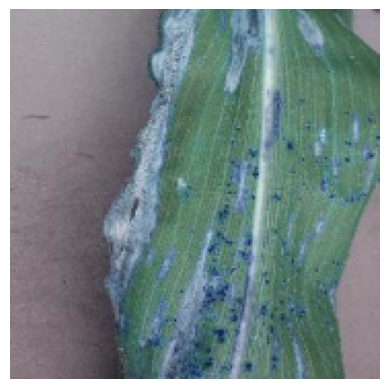

In [6]:
# Scalling
x_train_scaled=x_train/255 #Scale of 0.,1.0
x_test_scaled=x_test/255
print(x_train_scaled[0])
plt.imshow(x_train_scaled[0]) #Display image
plt.axis('off')
plt.show()

### Creating augmentation function 1

In [7]:
augmentation1=keras.Sequential([
    tf.keras.layers.RandomContrast(
    0.9, seed=None
)
])


### Augmenting the training data one

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tf.Tensor(
[[[0.7377171  0.68491447 0.7185352 ]
  [0.7321233  0.68491447 0.7129414 ]
  [0.7377171  0.69050825 0.72412896]
  ...
  [0.37971503 0.30453727 0.3661269 ]
  [0.29021454 0.21503675 0.2766264 ]
  [0.34055856 0.2653808  0.32137665]]

 [[0.7321233  0.6793207  0.7129414 ]
  [0.72652954 0.6737269  0.70734763]
  [0.7321233  0.6793207  0.7129414 ]
  ...
  [0.55871606 0.48353827 0.545128  ]
  [0.4468404  0.37166265 0.43325227]
  [0.40768394 0.33250618 0.3940958 ]]

 [[0.74890465 0.696102   0.72972274]
  [0.7377171  0.68491447 0.7185352 ]
  [0.74890465 0.696102   0.72972274]
  ...
  [0.60346633 0.52828854 0.5898782 ]
  [0.59787256 0.52269477 0.5842844 ]
  [0.60346633 0.52828854 0.5898782 ]]

 ...

 [[0.6090601  0.50591344 0.5339404 ]
  [0.586685   0.4779445  0.51156527]
  [0.5531223  0.4443818  0.47800255]
  ...
  [0.63702905 0.517101   0.55631554]
  [0.6090601  0.48913205 0.5283466 ]
  [0.6146539  0.49472582 0.5339404 ]]

 [[0.5531223  0.4443818  0.47800255]
  [0.5699036  0.46116313 0

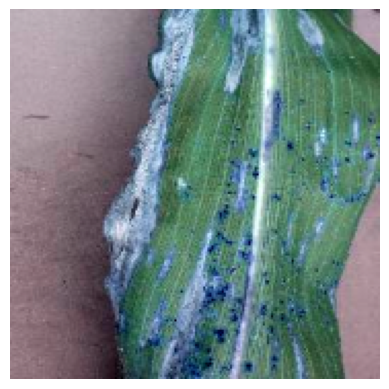

In [8]:
augmented_training1=augmentation1(x_train_scaled)
print(augmented_training1[0])
current_dir=pathlib.Path(os.getcwd())
try:
    if not os.path.isdir(str(current_dir)+"\Augmented"):
        os.mkdir("Augmented")
    os.chdir(str(current_dir)+"\Augmented")
    for i in range(len(augmented_training1)):
        plt.imsave(f"Augmented1_img{i}.jpg",augmented_training1[i].numpy())
except:
    pass
finally:
    os.chdir(str(current_dir))
plt.imshow(augmented_training1[0])
plt.axis('off')
plt.show()

### Augmentation function 2

In [9]:
augmentation2=Sequential([
    tf.keras.layers.RandomContrast(
    0.4, seed=None
    )
])


### Augmenting training data 2

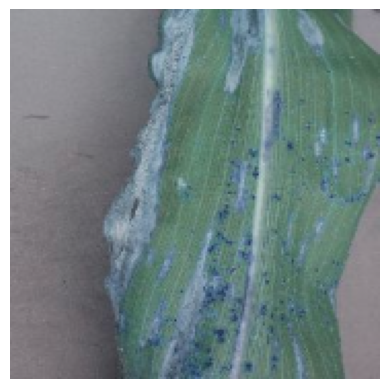

In [10]:
augmented_training2=augmentation2(x_train_scaled)
current_dir=pathlib.Path(os.getcwd())
try:
    if not os.path.isdir(str(current_dir)+"\Augmented"):
        os.mkdir("Augmented")
    os.chdir(str(current_dir)+"\Augmented")
    for i in range(len(augmented_training2)):
        plt.imsave(f"Augmented2_img{i}.jpg",augmented_training2[i].numpy())
except:
    pass
finally:
    os.chdir(str(current_dir))
plt.imshow(augmented_training2[0]) #Display our augmented image
plt.axis('off')
plt.show()

### Testing Image

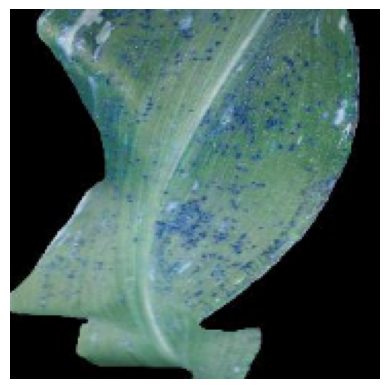

In [11]:
plt.imshow(x_test_scaled[1]) #Original test image,(Not augmented)
plt.axis('off')
plt.show()

### Augmenting test data 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


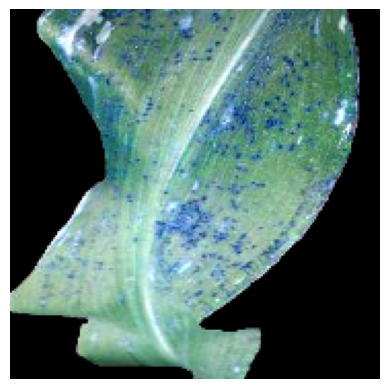

In [12]:
augmented_testing1=augmentation1(x_test_scaled) #factor- 0.9
plt.imshow(augmented_testing1[1]) #Display augmented image of a particular index
plt.axis('off')
plt.show()

### Augmenting test data 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


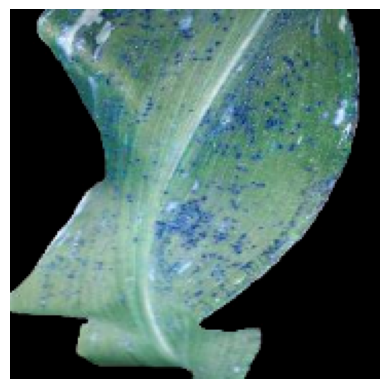

In [13]:
augmented_test2=augmentation2(x_test_scaled) #factor=0.4
plt.imshow(augmented_test2[1])
plt.axis('off')
plt.show()

# Classifying Original and Augmented images
### Loading the data

In [14]:
maize_leaf_disease_dict={
    "Original":list(glob.glob(f"{data_dir}/data/*.jpg")),
    "Augmented":list(glob.glob(f"{os.getcwd()}/Augmented/*.jpg"))
}
print(len(maize_leaf_disease_dict["Original"]))
print(len(maize_leaf_disease_dict["Augmented"]))

4186
5860


In [15]:
augmented_labels_dict={
    "Original":0,
    "Augmented":1
}

In [16]:
print(len(maize_leaf_disease_dict["Augmented"]))

5860


### Loading of the data

In [17]:
x,y=[],[]
for augmented_original,images in maize_leaf_disease_dict.items():
    for image in images:
        img=cv2.imread(str(image))#Convert image to pixels
        resized_img=cv2.resize(img,(180,180))#Images to be of same size
        x.append(resized_img)#Pixels
        y.append(augmented_labels_dict[augmented_original])#Label Random 0,1
print(x[0])
print(y[:5])
x=np.array(x)
y=np.array(y)

[[[ 29  86  77]
  [ 36  84  69]
  [ 28  84  60]
  ...
  [  1 110  84]
  [  1 103  75]
  [  2 109  86]]

 [[ 19  83  66]
  [ 24  79  58]
  [ 27  87  62]
  ...
  [  3 115  87]
  [  3 111  83]
  [  8 109  86]]

 [[ 25  85  71]
  [ 35  87  73]
  [ 30  85  69]
  ...
  [  5 120  95]
  [  4 118  96]
  [ 14 121 103]]

 ...

 [[ 26 135  96]
  [ 34 143 117]
  [ 20 136 105]
  ...
  [ 15 125  88]
  [ 16 124  85]
  [ 12 123  81]]

 [[ 22 131  96]
  [ 25 134 109]
  [ 17 133 106]
  ...
  [ 10 122  83]
  [ 11 116  79]
  [ 11 118  80]]

 [[ 20 131  97]
  [ 30 139 114]
  [ 26 140 119]
  ...
  [ 15 124  84]
  [ 14 117  81]
  [ 13 113  75]]]
[0, 0, 0, 0, 0]


In [18]:
print(x.dtype)

uint8


In [19]:
print(y)

[0 0 0 ... 1 1 1]


### Test, Train split

In [20]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=0) #Splitting
print(len(x_train))
print(len(x_test))
print(x_train.dtype)
print(x_train.dtype)

7032
3014
uint8
uint8


### Scaling

In [21]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255
print(x_train_scaled[0])

[[[0.11372549 0.24313725 0.09803922]
  [0.07843137 0.21176471 0.05490196]
  [0.07843137 0.2        0.04705882]
  ...
  [0.23921569 0.42745098 0.22352941]
  [0.36078431 0.54901961 0.34509804]
  [0.35686275 0.54509804 0.34117647]]

 [[0.09411765 0.22352941 0.07843137]
  [0.06666667 0.2        0.04313725]
  [0.07843137 0.20392157 0.04313725]
  ...
  [0.23529412 0.42352941 0.21960784]
  [0.34117647 0.52941176 0.3254902 ]
  [0.3372549  0.5254902  0.32156863]]

 [[0.07843137 0.21176471 0.05490196]
  [0.06666667 0.2        0.04313725]
  [0.09019608 0.21568627 0.05490196]
  ...
  [0.23529412 0.42352941 0.21960784]
  [0.33333333 0.52156863 0.31764706]
  [0.3372549  0.5254902  0.32156863]]

 ...

 [[0.22745098 0.37254902 0.09803922]
  [0.22745098 0.37254902 0.09803922]
  [0.21960784 0.37647059 0.09411765]
  ...
  [0.38039216 0.51764706 0.29803922]
  [0.3372549  0.4745098  0.25490196]
  [0.25490196 0.39215686 0.17254902]]

 [[0.21960784 0.36470588 0.09019608]
  [0.21960784 0.36470588 0.09019608]


### Creating our CNN Model

In [22]:
num_classes=2
model=Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),# Applied 16 filters of 3 X 3 Matrix
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    #128 neourons--> try and error
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes) #if 0 neuron is activated it means its Original, no activation(linear activation)
])

### Compiling the model

In [23]:
model.compile(optimizer="adam",
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"]
             )

In [24]:
print(x_train_scaled.dtype)
print(y_train.dtype)

float64
int32


### Training the CNN Model

In [25]:
model.fit(x_train_scaled,y_train,epochs=10)

Epoch 1/10
220/220 [==============================] - 134s 576ms/step - loss: 0.3367 - accuracy: 0.8737
Epoch 2/10
220/220 [==============================] - 106s 480ms/step - loss: 0.1741 - accuracy: 0.9322
Epoch 3/10
220/220 [==============================] - 106s 483ms/step - loss: 0.1496 - accuracy: 0.9414
Epoch 4/10
220/220 [==============================] - 109s 493ms/step - loss: 0.1075 - accuracy: 0.9595
Epoch 5/10
220/220 [==============================] - 111s 503ms/step - loss: 0.0979 - accuracy: 0.9627
Epoch 6/10
220/220 [==============================] - 112s 509ms/step - loss: 0.0694 - accuracy: 0.9747
Epoch 7/10
220/220 [==============================] - 101s 459ms/step - loss: 0.0653 - accuracy: 0.9741
Epoch 8/10
220/220 [==============================] - 102s 464ms/step - loss: 0.0495 - accuracy: 0.9792
Epoch 9/10
220/220 [==============================] - 122s 553ms/step - loss: 0.0523 - accuracy: 0.9821
Epoch 10/10
220/220 [==============================] - 128s 582m

In [26]:
model.evaluate(x_test_scaled,y_test)

95/95 [==============================] - 21s 201ms/step - loss: 0.1203 - accuracy: 0.9625


[0.12030152976512909, 0.9625083208084106]

In [30]:
prediction=model.predict(x_train_scaled)
score=tf.nn.softmax(prediction[0])
print(score)
print(np.argmax(score))

tf.Tensor([0.48555517 0.5144448 ], shape=(2,), dtype=float32)
1


### Saving the model

In [31]:
model.save("augmentation_model") 

INFO:tensorflow:Assets written to: augmentation_model\assets


### Reconstruct a new model from the final model

In [32]:
reconstructed_model = keras.models.load_model("augmentation_model") 